In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [93]:
df = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)

In [94]:
df[:10]

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
6,AS14.01,2014-02-27 12:00:00.000,mood,6.0
7,AS14.01,2014-02-27 15:00:00.000,mood,7.0
8,AS14.01,2014-03-21 09:00:00.000,mood,6.0
9,AS14.01,2014-03-21 11:00:00.000,mood,6.0
10,AS14.01,2014-03-21 15:00:00.000,mood,7.0


In [95]:
#remove the time element, because we don't use it. But keep the date
df[['Date','Time']] = df.time.str.split(expand=True)

In [96]:
df = df.drop(columns="time")
df = df.drop(columns="Time")
df.head()

,id,variable,value,Date
1,AS14.01,mood,6.0,2014-02-26
2,AS14.01,mood,6.0,2014-02-26
3,AS14.01,mood,6.0,2014-02-26
4,AS14.01,mood,7.0,2014-02-26
5,AS14.01,mood,6.0,2014-02-27


In [97]:
# make a list of dataframes with one dataframe per attribute so we can aggregate differently per attribute. 
grouped = df.groupby(df.variable)

df_list = []
df.variable.unique()

VARIABLE_LIST = df.variable.unique()

for var in df.variable.unique():
    sep_data = grouped.get_group(var)
    df_list.append(sep_data)

df_list



[           id variable  value        Date
 1     AS14.01     mood    6.0  2014-02-26
 2     AS14.01     mood    6.0  2014-02-26
 3     AS14.01     mood    6.0  2014-02-26
 4     AS14.01     mood    7.0  2014-02-26
 5     AS14.01     mood    6.0  2014-02-27
 6     AS14.01     mood    6.0  2014-02-27
 7     AS14.01     mood    7.0  2014-02-27
 8     AS14.01     mood    6.0  2014-03-21
 9     AS14.01     mood    6.0  2014-03-21
 10    AS14.01     mood    7.0  2014-03-21
 11    AS14.01     mood    6.0  2014-03-21
 12    AS14.01     mood    6.0  2014-03-21
 13    AS14.01     mood    7.0  2014-03-22
 14    AS14.01     mood    7.0  2014-03-22
 15    AS14.01     mood    7.0  2014-03-22
 16    AS14.01     mood    6.0  2014-03-22
 17    AS14.01     mood    5.0  2014-03-22
 18    AS14.01     mood    7.0  2014-03-23
 19    AS14.01     mood    7.0  2014-03-23
 20    AS14.01     mood    8.0  2014-03-23
 21    AS14.01     mood    6.0  2014-03-23
 22    AS14.01     mood    6.0  2014-03-23
 23    AS14

In [98]:
#aggregate data from one day (but different times) in the right way (mood, arousal, valence and activity: take the mean, 
# call and sms take the highest, all else (unit time) take sum)

aggregation_mean = {'value': 'mean'}
aggregation_highest = {'value': 'max'}
aggregation_sum = {'value': 'sum'}
for i in range(0,4):
    df_list[i] = df_list[i].groupby(['id','Date','variable']).aggregate(aggregation_mean).reset_index()
for i in range(5,7):
    df_list[i] = df_list[i].groupby(['id','Date','variable']).aggregate(aggregation_highest).reset_index()
for i in range(7,19):
    df_list[i] = df_list[i].groupby(['id','Date','variable']).aggregate(aggregation_sum).reset_index()
df_list[4] = df_list[4].groupby(['id','Date','variable']).aggregate(aggregation_sum).reset_index()

df_list

[           id        Date variable     value
 0     AS14.01  2014-02-26     mood  6.250000
 1     AS14.01  2014-02-27     mood  6.333333
 2     AS14.01  2014-03-21     mood  6.200000
 3     AS14.01  2014-03-22     mood  6.400000
 4     AS14.01  2014-03-23     mood  6.800000
 5     AS14.01  2014-03-24     mood  6.000000
 6     AS14.01  2014-03-25     mood  6.750000
 7     AS14.01  2014-03-26     mood  6.600000
 8     AS14.01  2014-03-27     mood  7.000000
 9     AS14.01  2014-03-28     mood  6.400000
 10    AS14.01  2014-03-29     mood  8.000000
 11    AS14.01  2014-03-30     mood  7.500000
 12    AS14.01  2014-03-31     mood  7.400000
 13    AS14.01  2014-04-01     mood  6.000000
 14    AS14.01  2014-04-02     mood  6.500000
 15    AS14.01  2014-04-03     mood  6.400000
 16    AS14.01  2014-04-04     mood  6.200000
 17    AS14.01  2014-04-05     mood  6.800000
 18    AS14.01  2014-04-06     mood  6.500000
 19    AS14.01  2014-04-07     mood  6.500000
 20    AS14.01  2014-04-08     moo

In [99]:
# some graphs of variables per person (you can pick which variable to plot by adjusting the 0) ignore the warnings, the graphs are underneath

/Users/Fabri/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


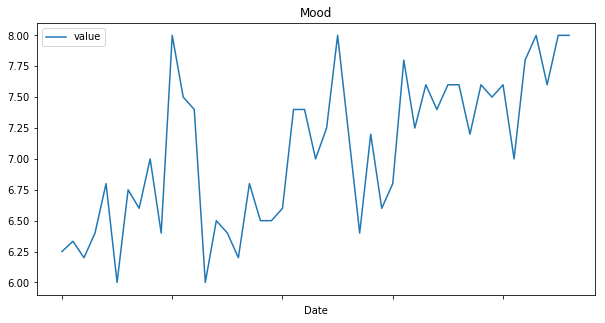

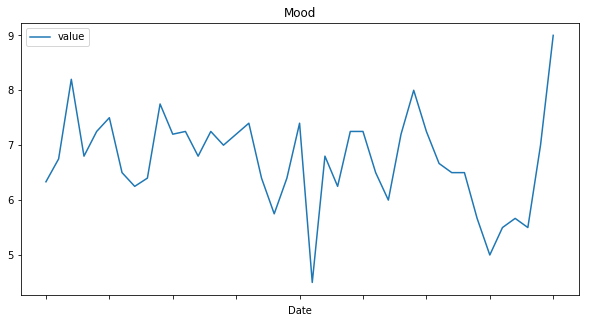

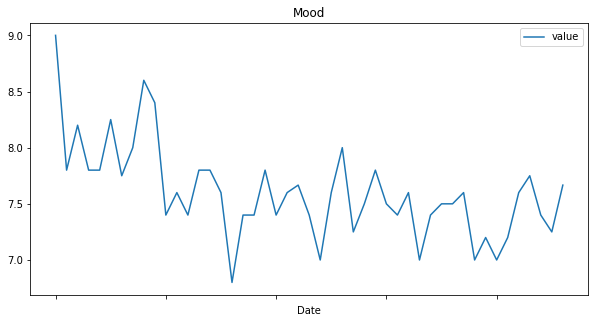

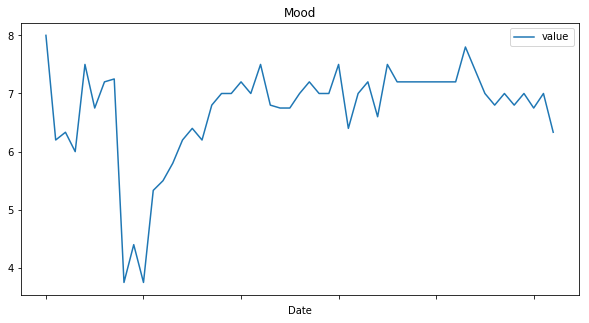

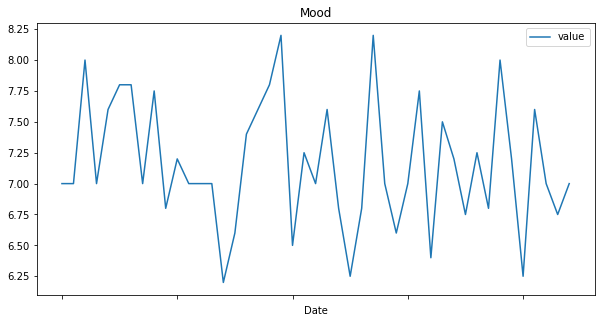

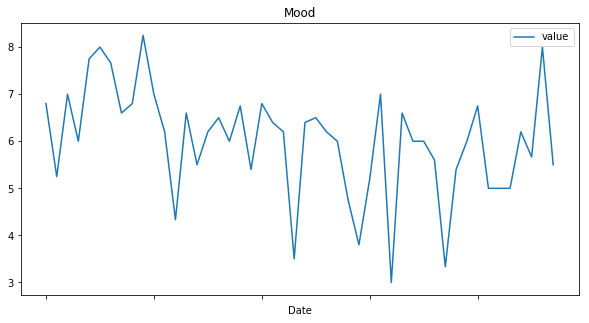

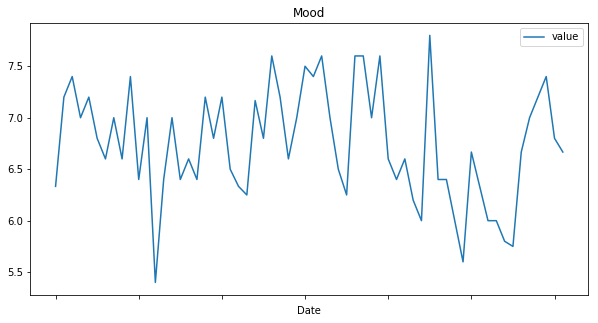

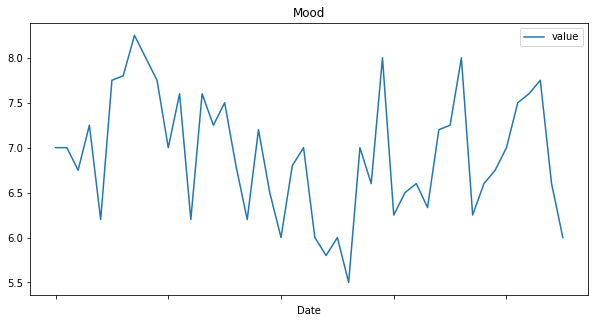

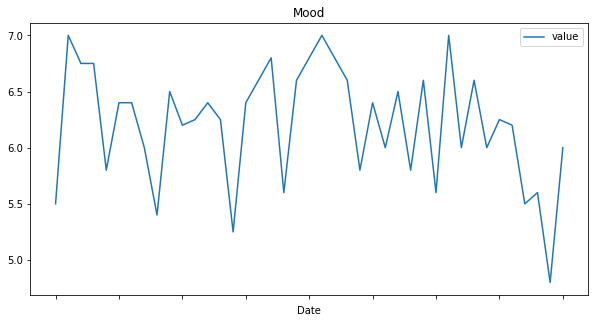

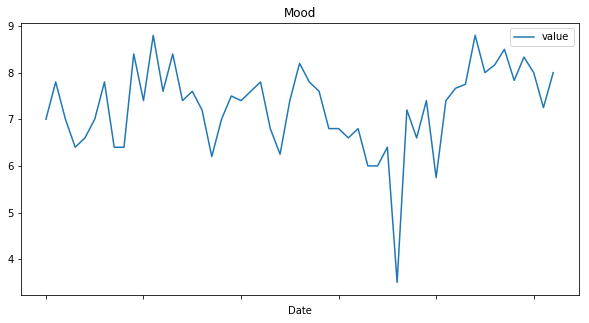

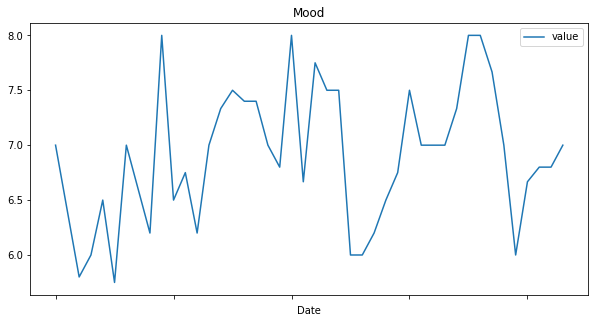

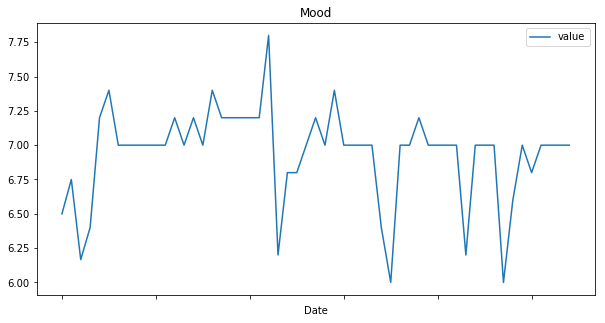

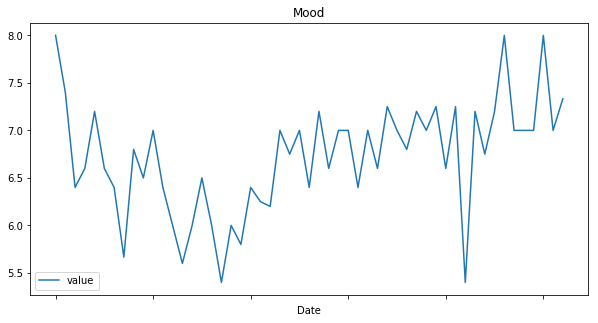

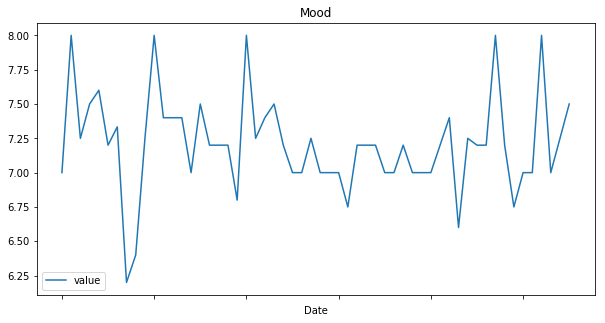

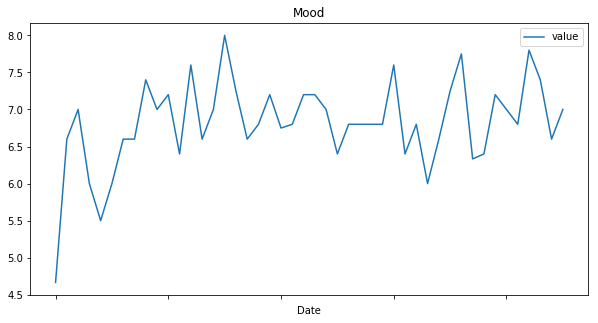

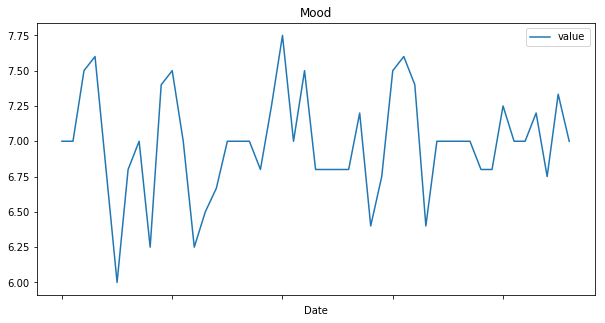

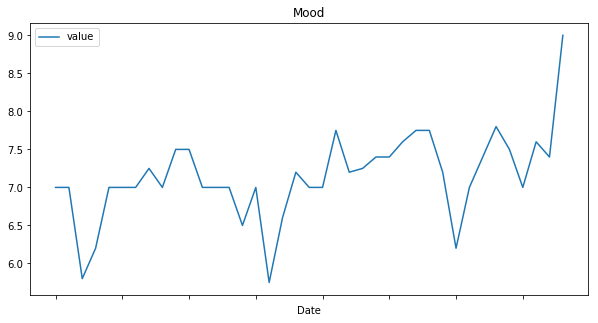

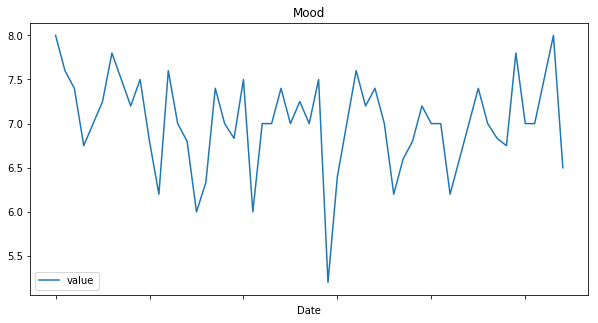

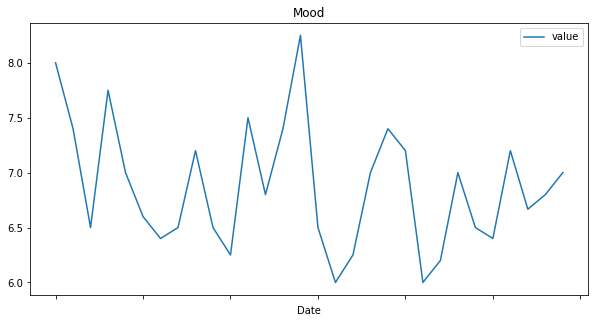

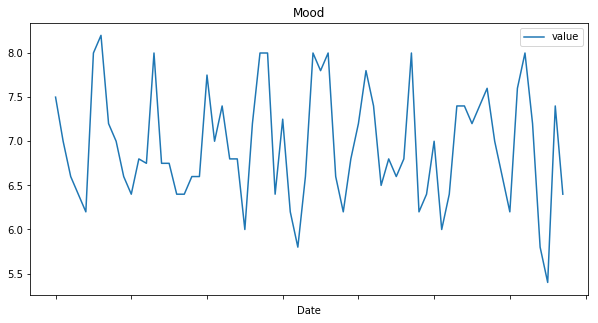

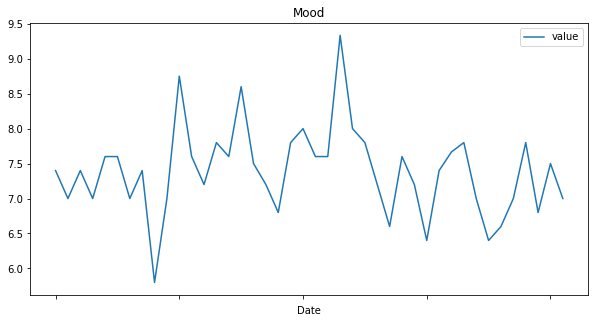

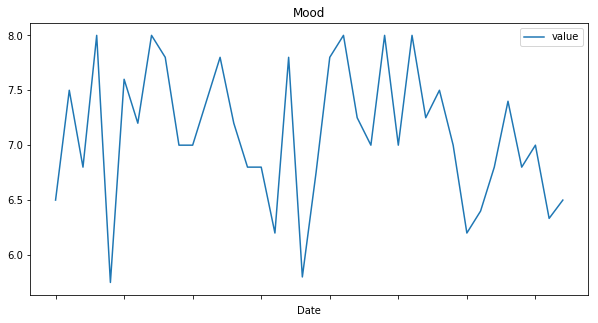

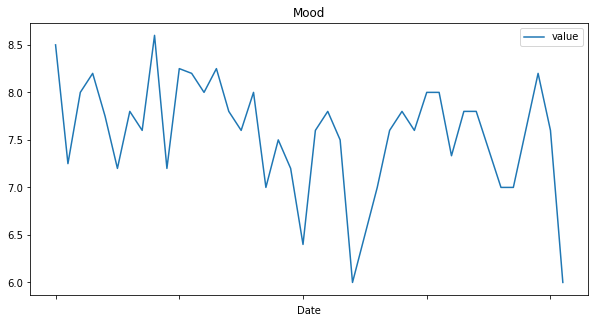

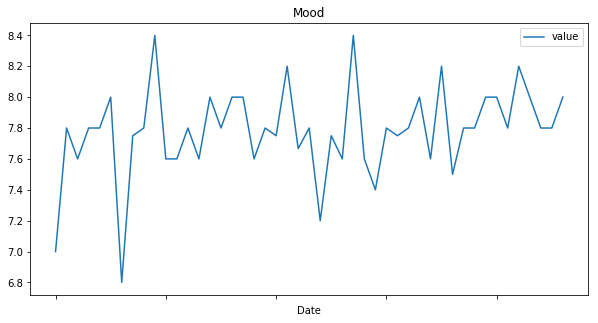

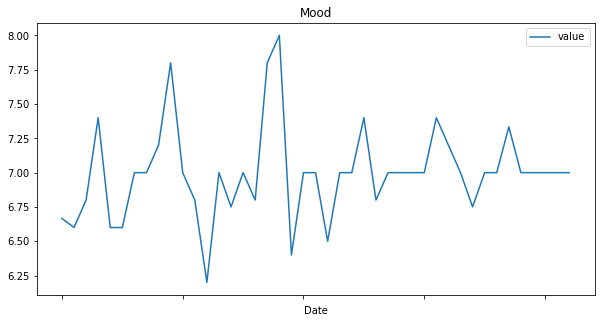

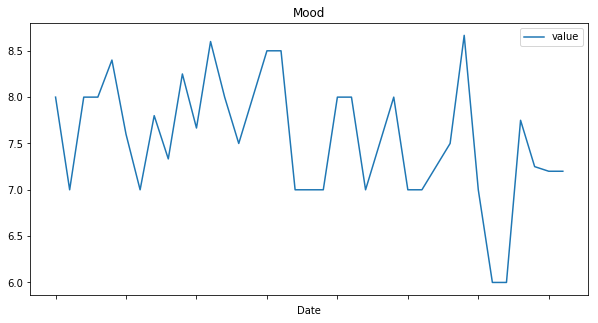

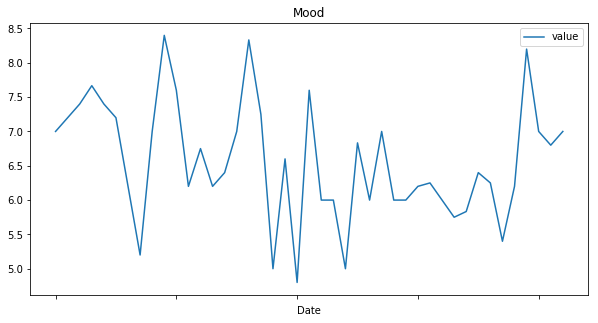

In [100]:
bp = df_list[0].groupby('id').plot('Date','value', figsize=(10,5), title='Mood')

/Users/Fabri/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


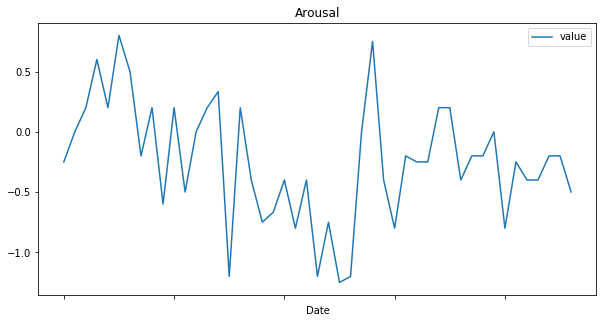

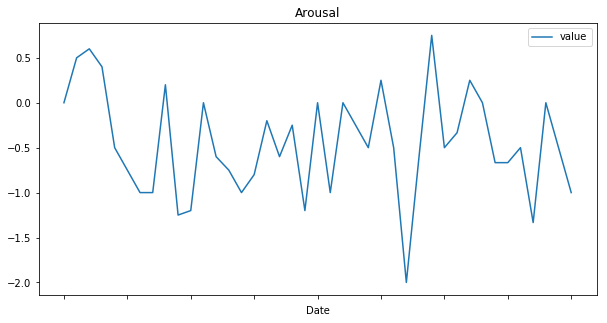

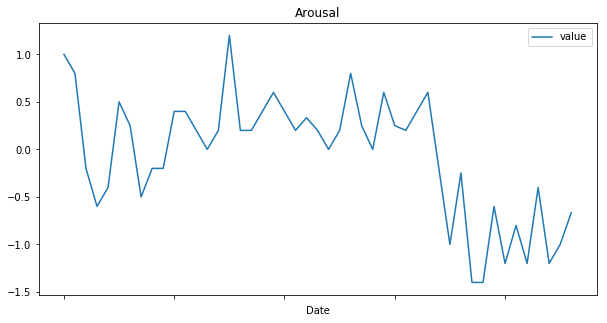

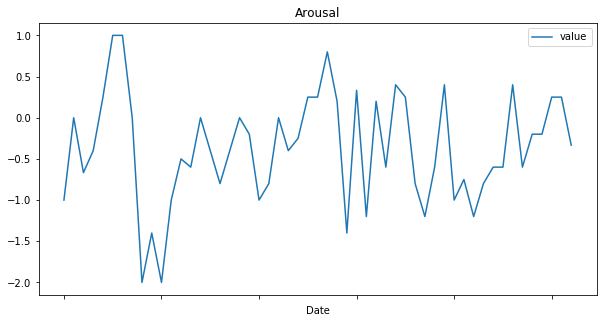

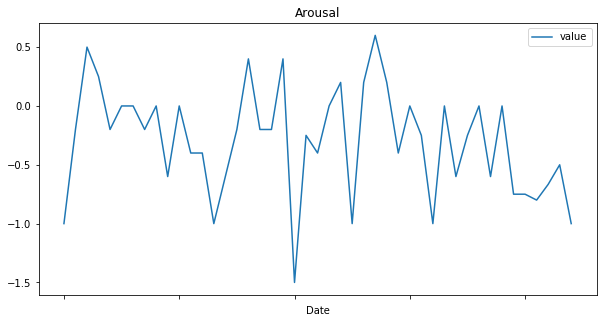

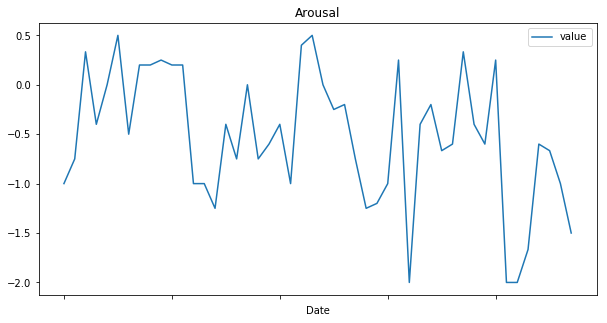

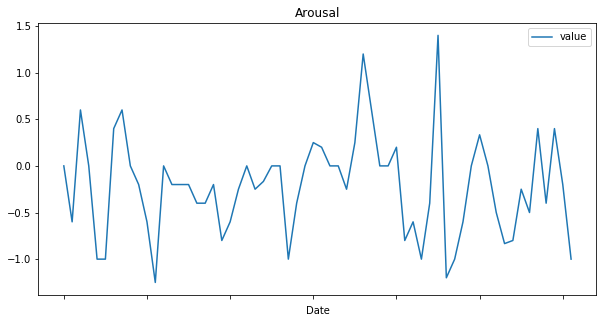

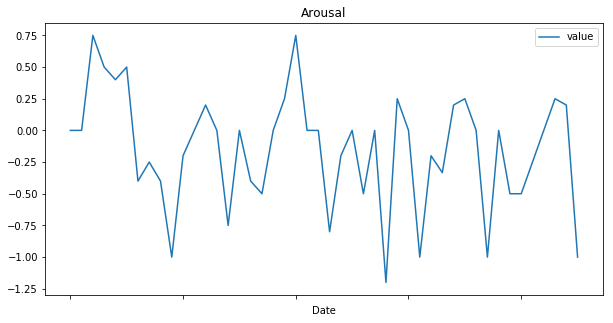

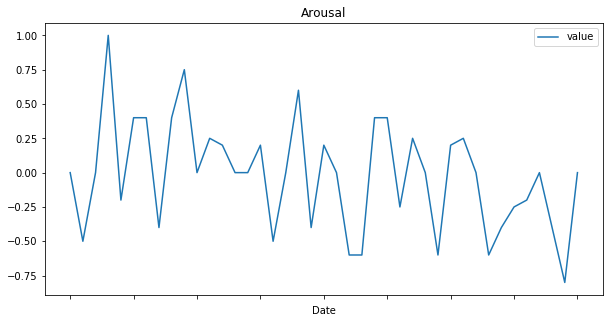

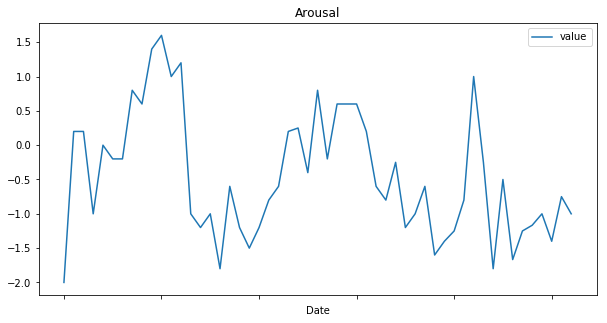

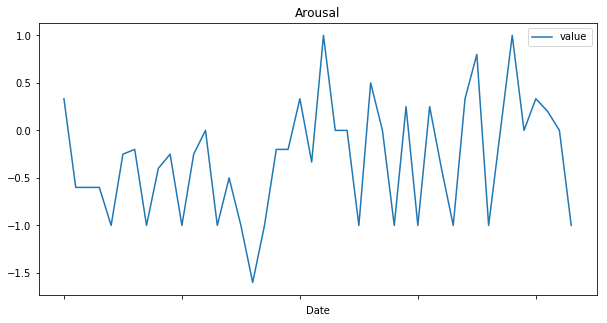

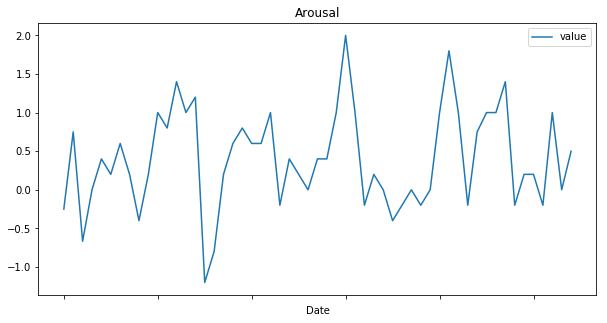

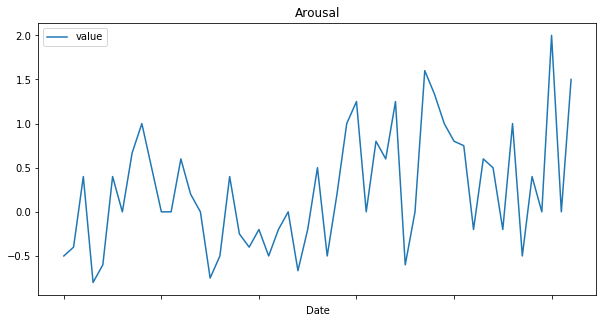

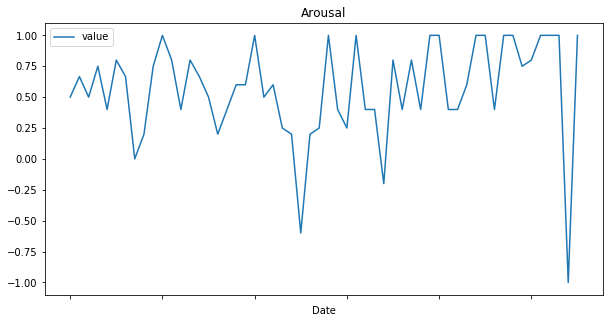

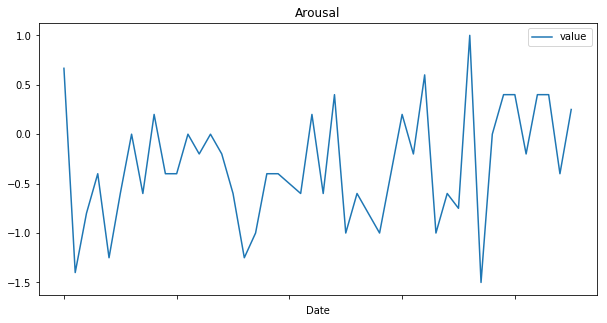

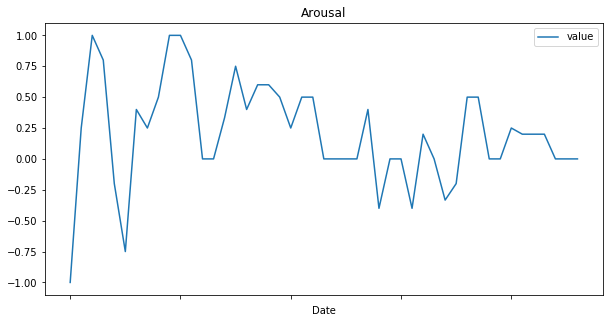

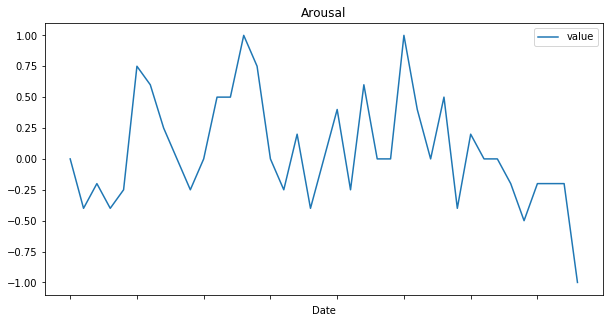

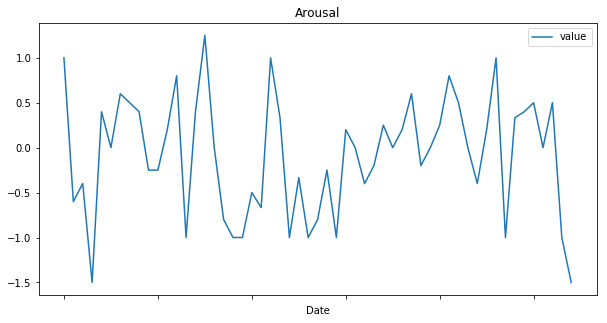

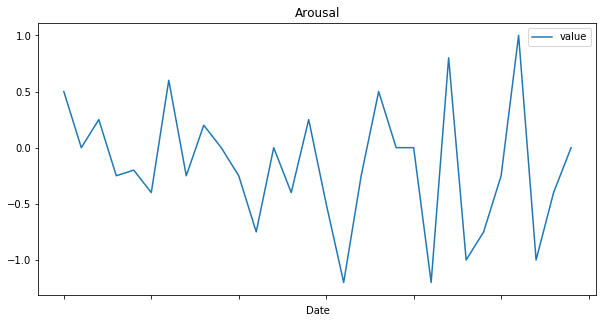

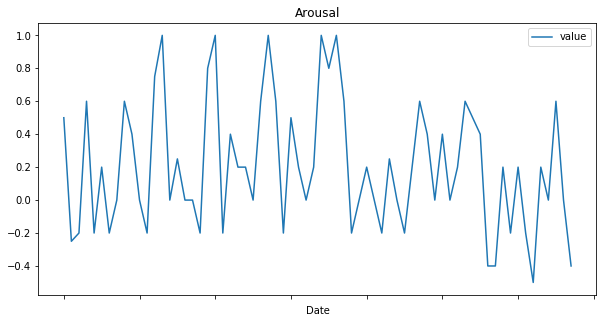

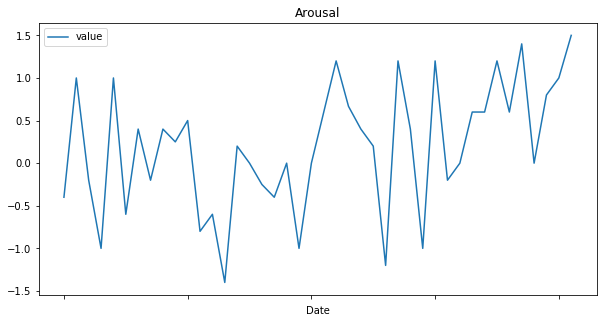

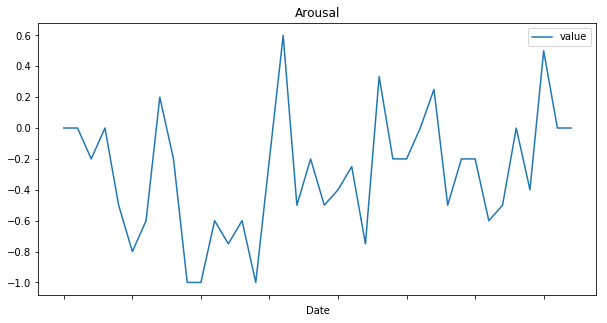

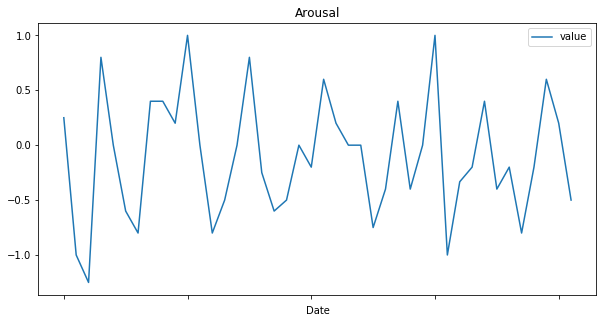

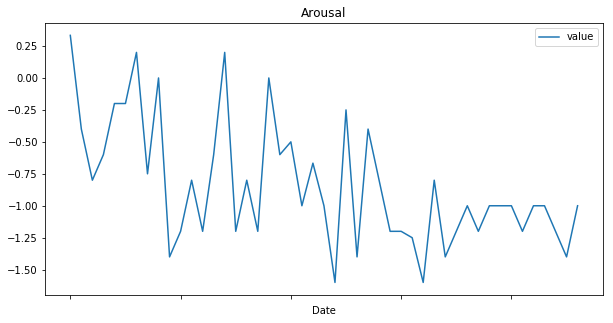

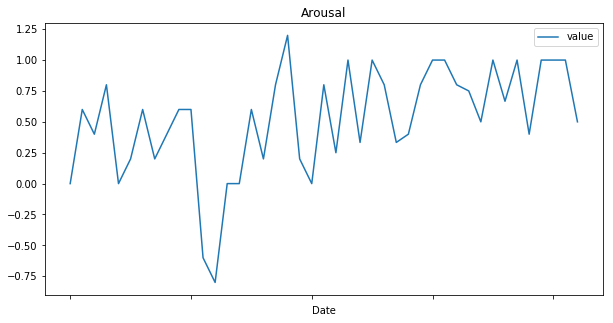

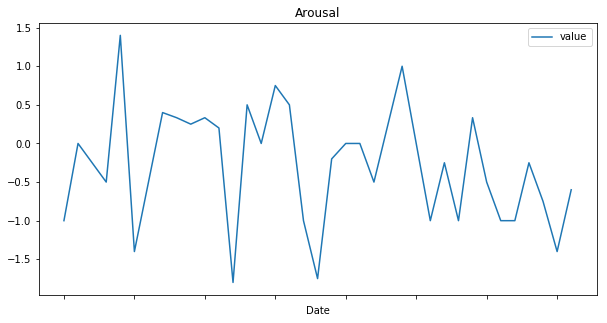

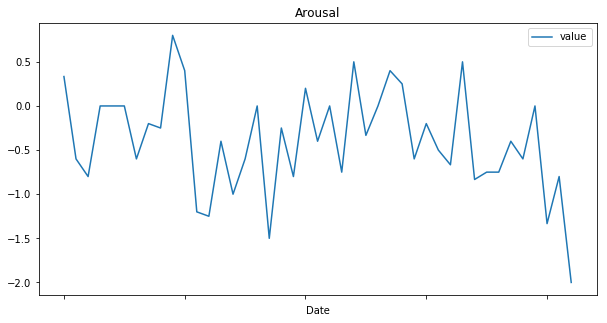

In [101]:
bp = df_list[1].groupby('id').plot('Date','value', figsize=(10,5), title='Arousal')

/Users/Fabri/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


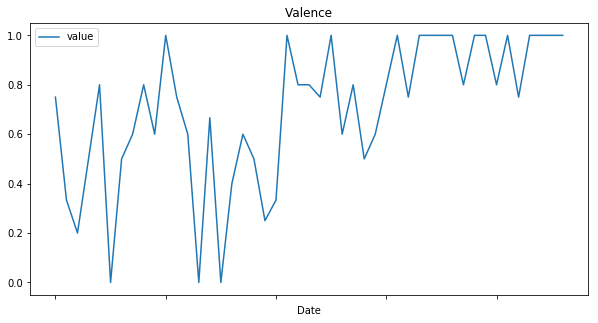

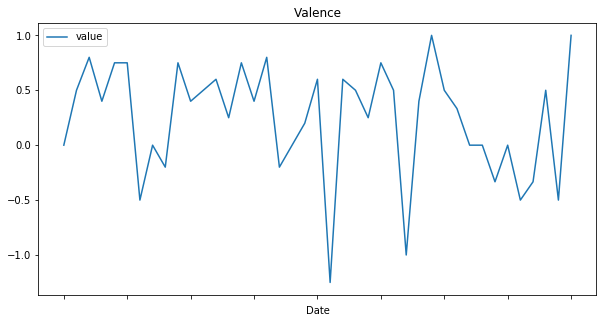

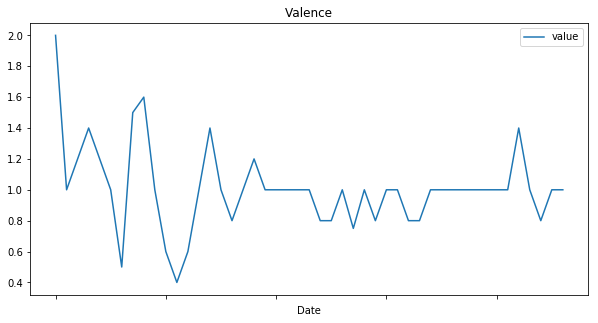

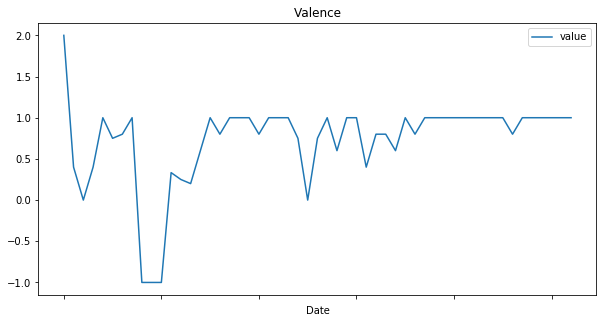

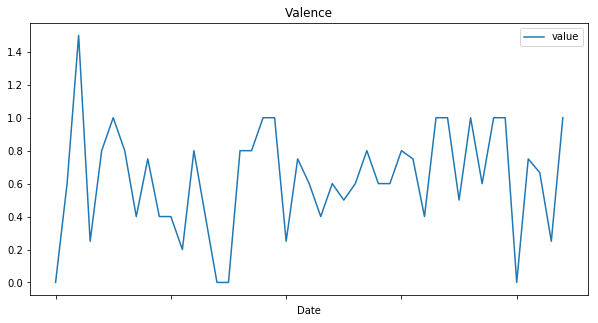

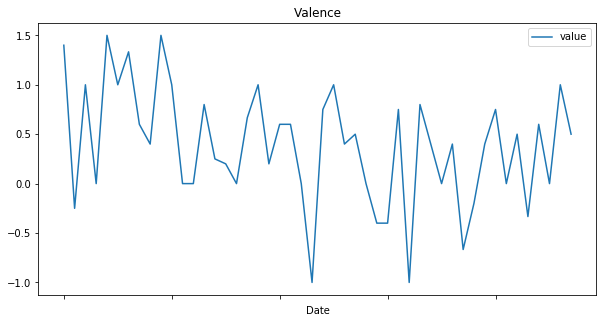

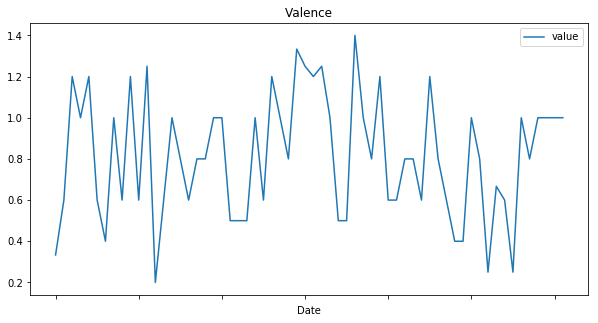

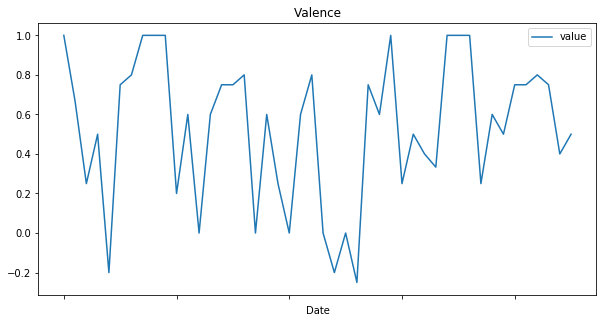

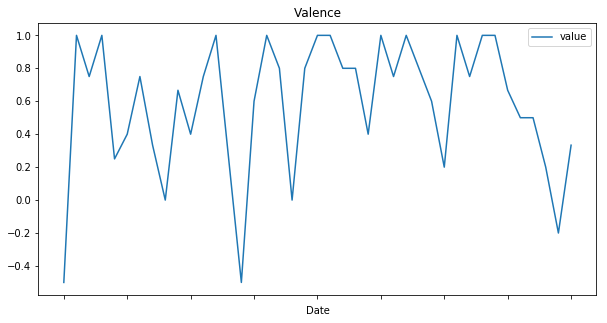

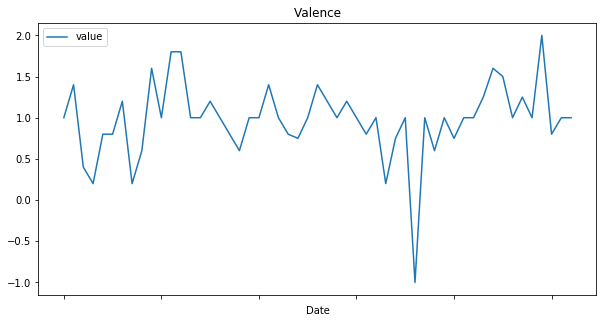

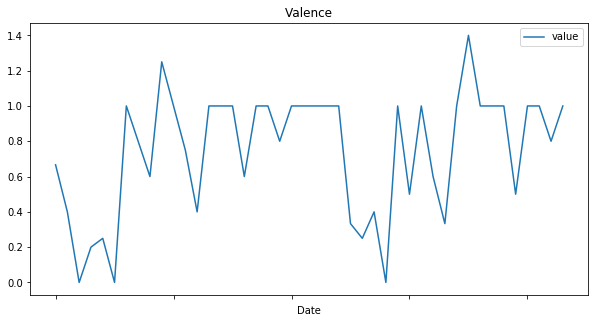

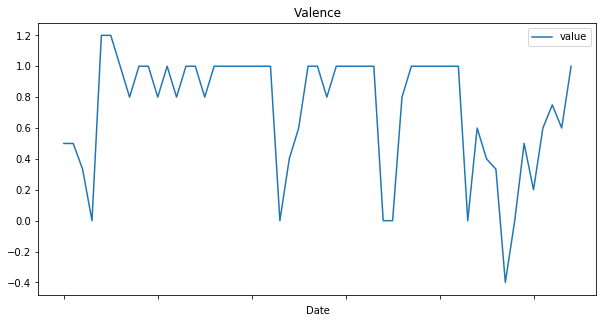

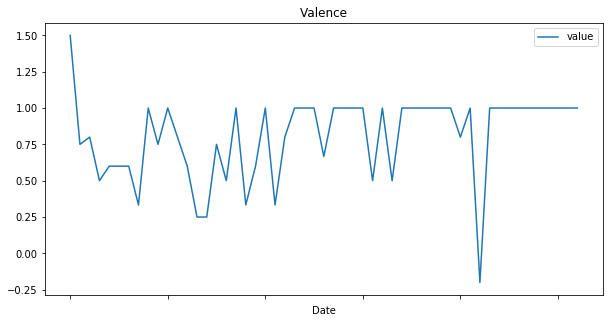

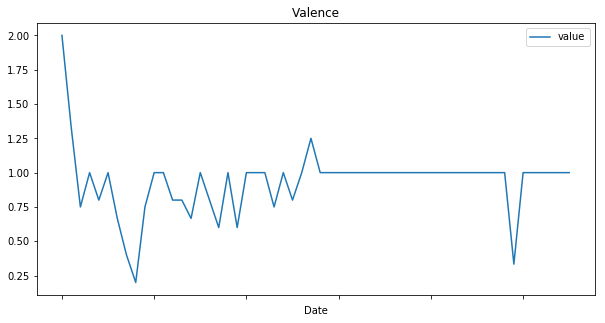

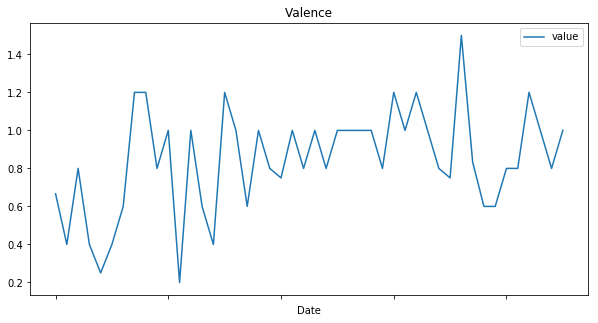

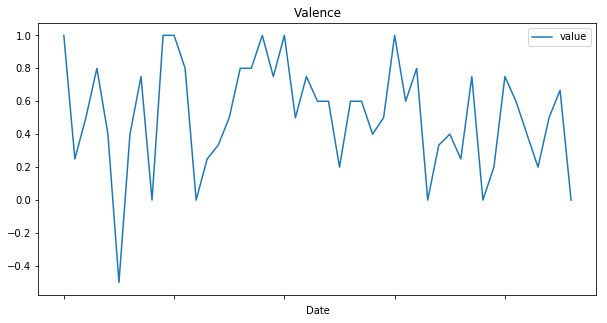

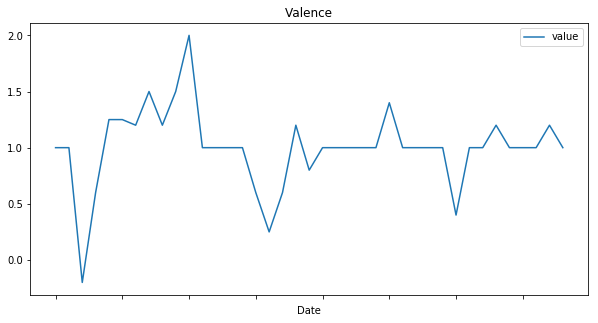

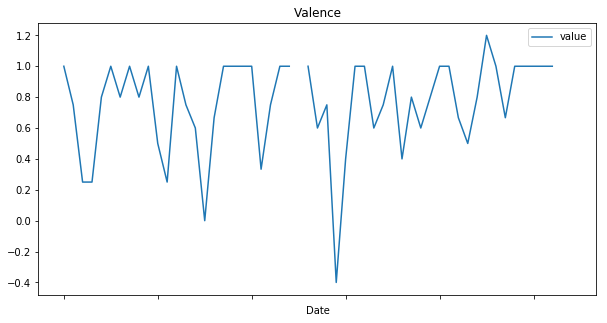

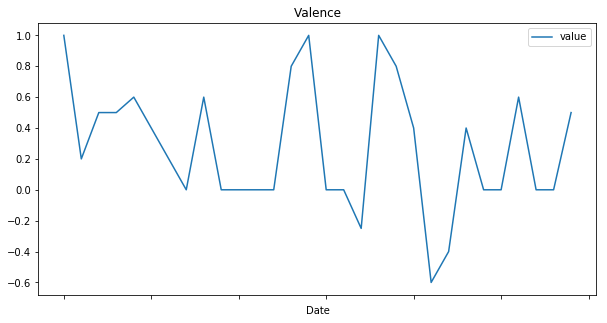

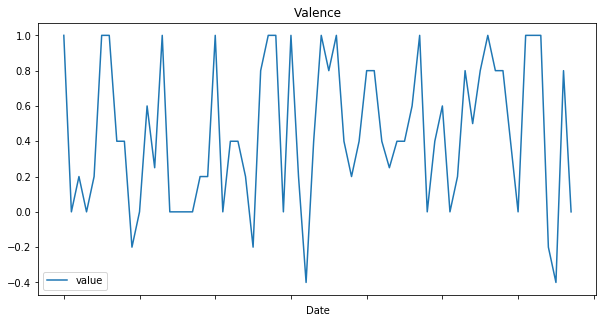

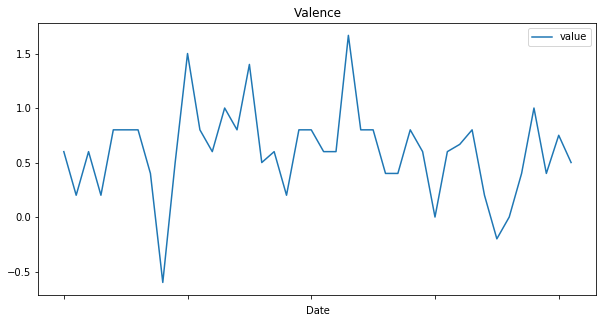

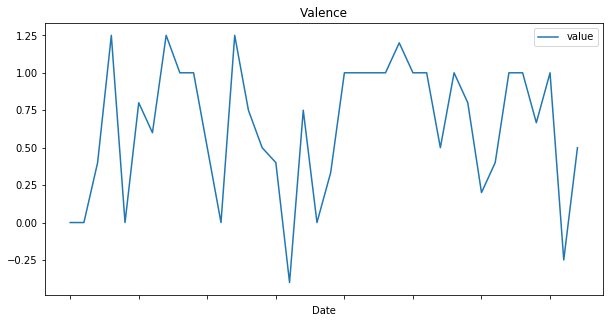

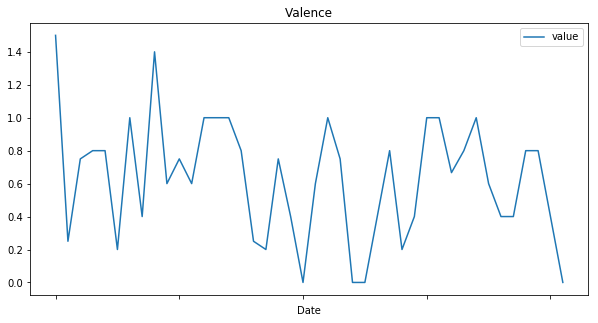

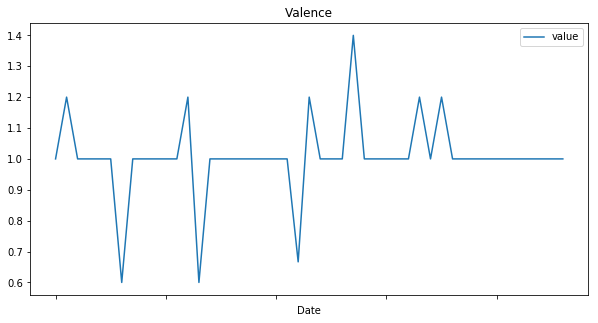

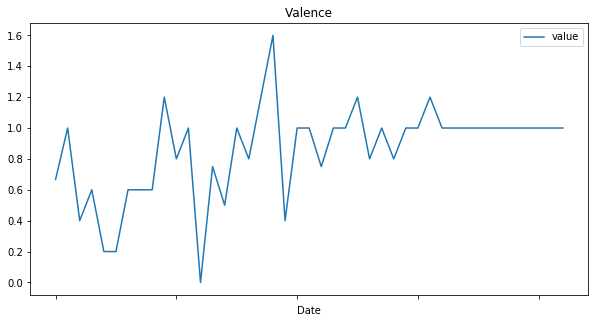

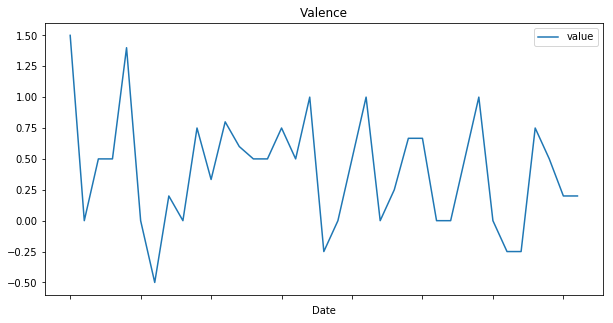

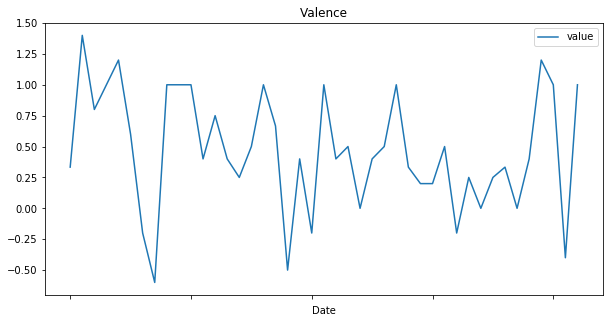

In [102]:
bp = df_list[2].groupby('id').plot('Date','value', figsize=(10,5),title='Valence')

/Users/Fabri/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


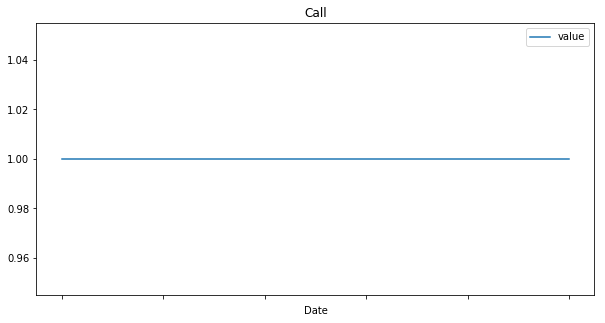

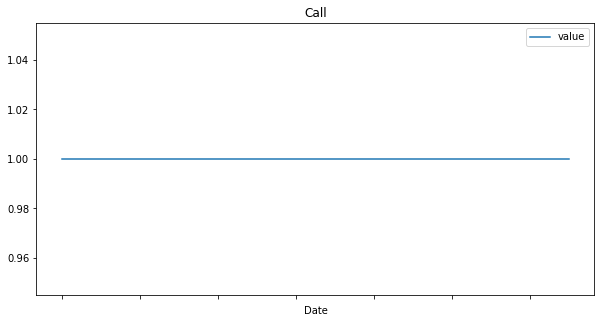

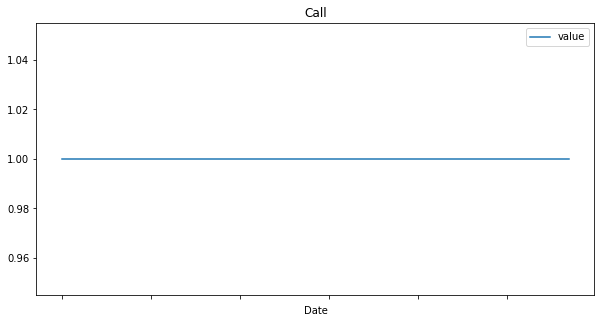

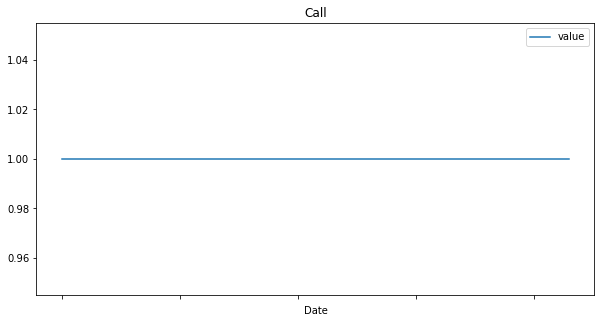

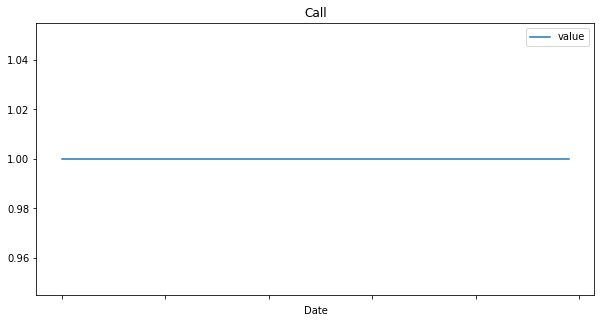

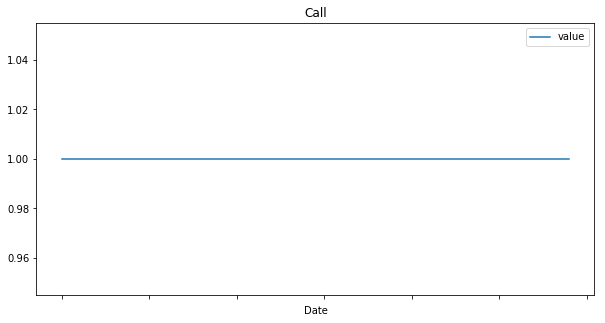

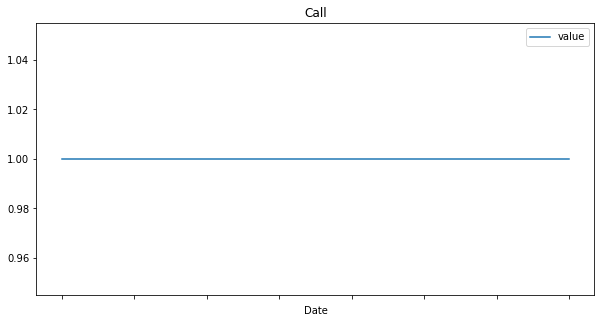

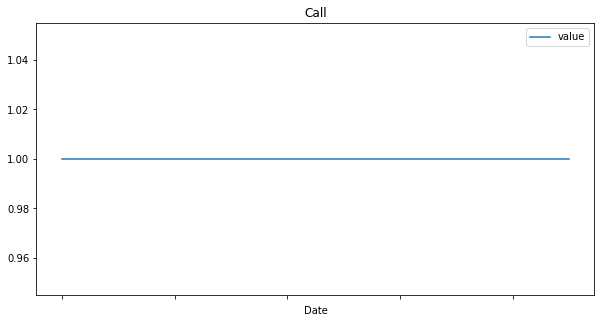

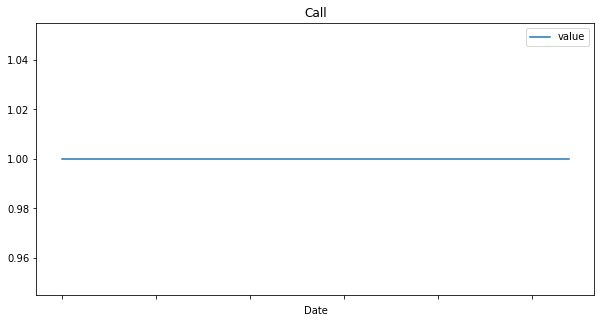

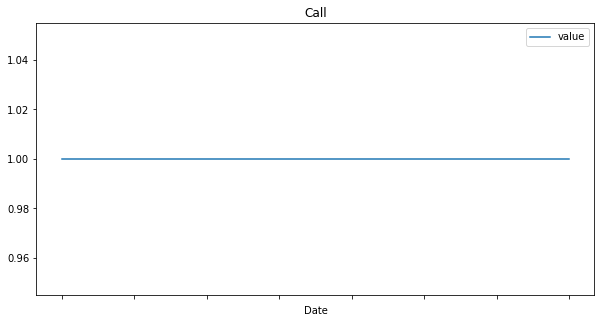

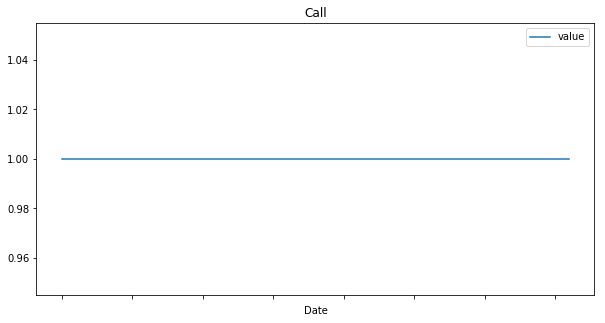

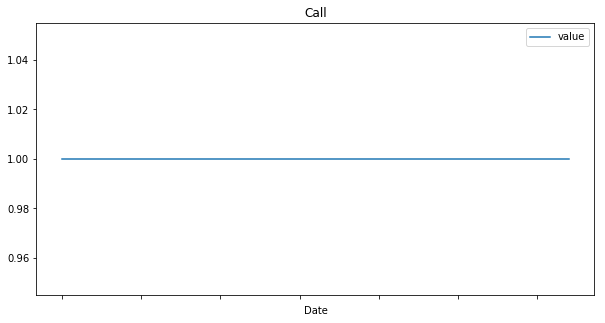

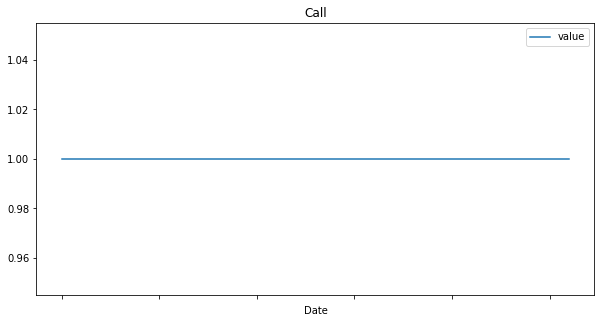

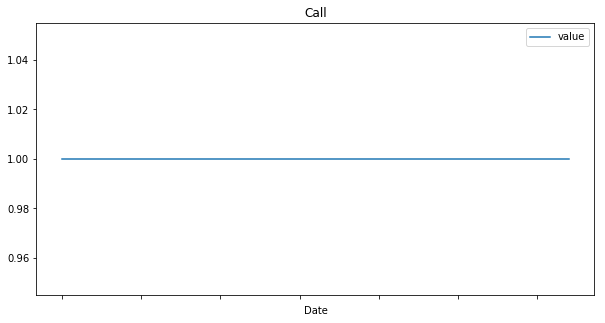

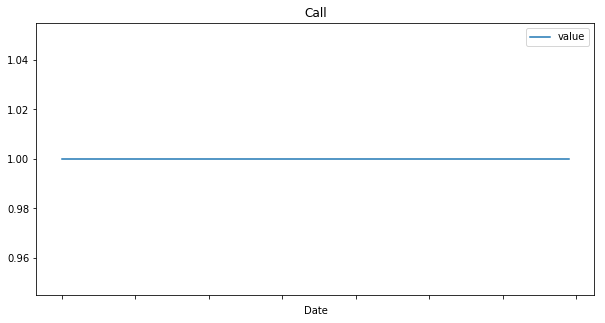

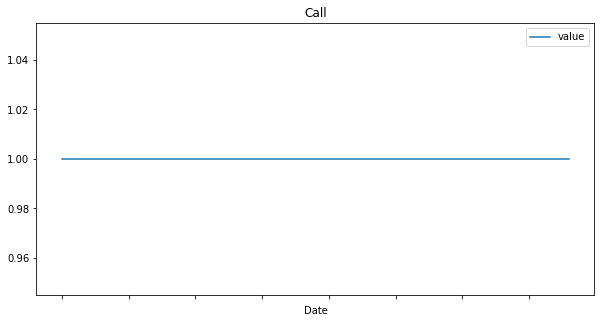

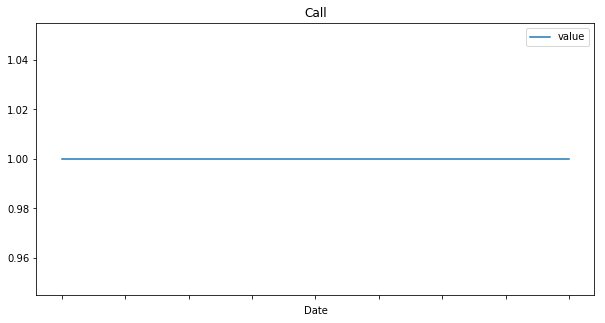

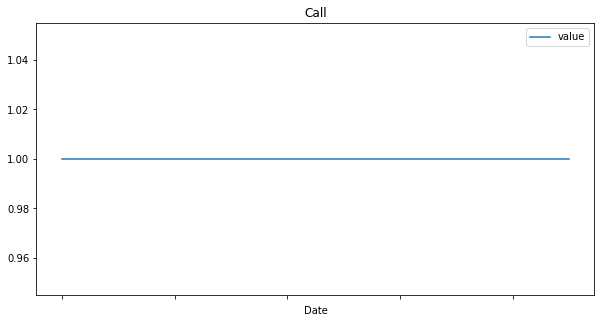

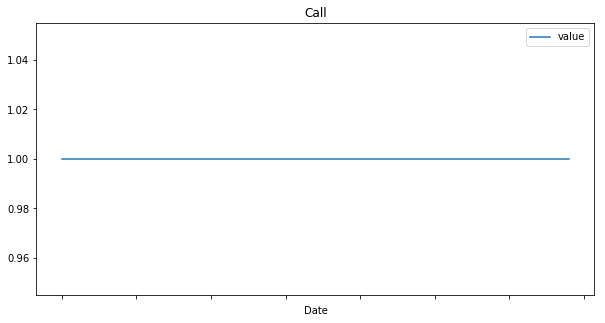

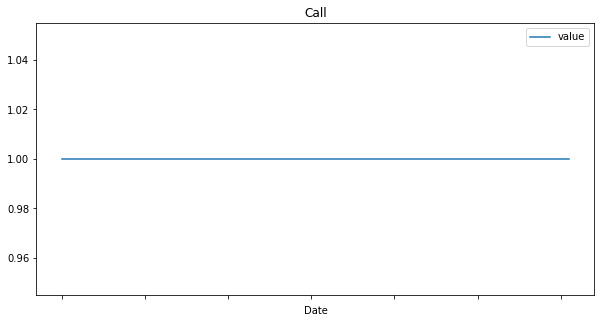

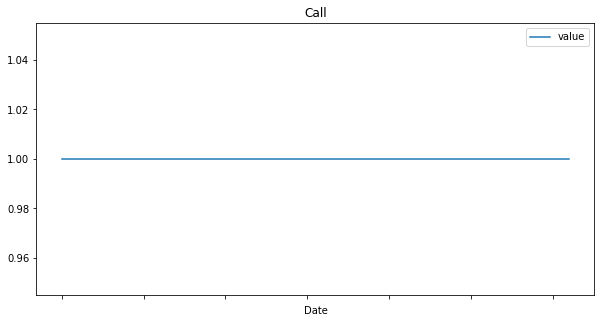

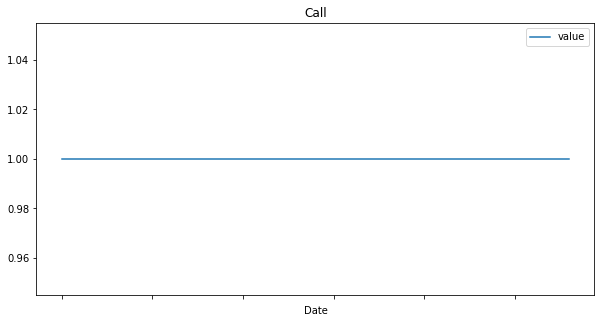

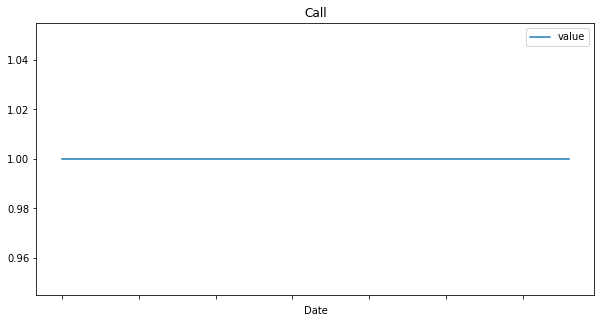

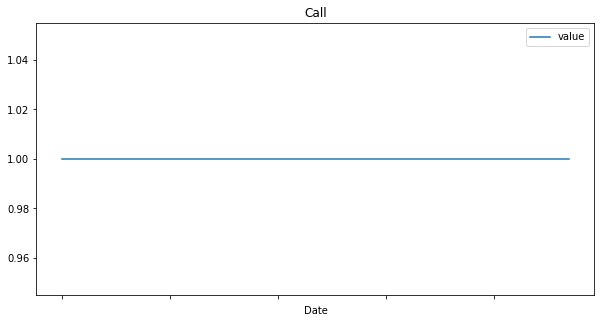

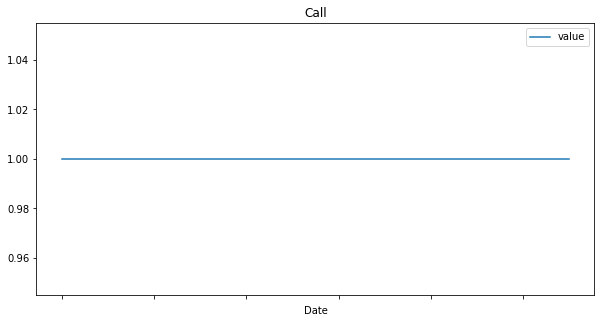

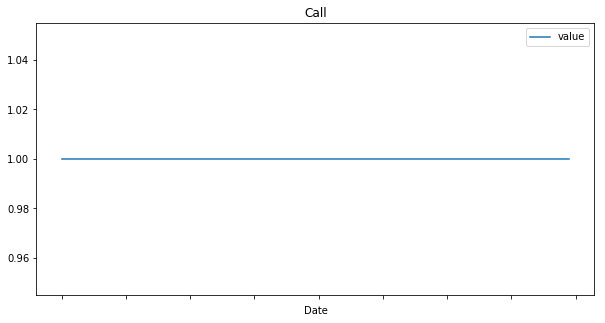

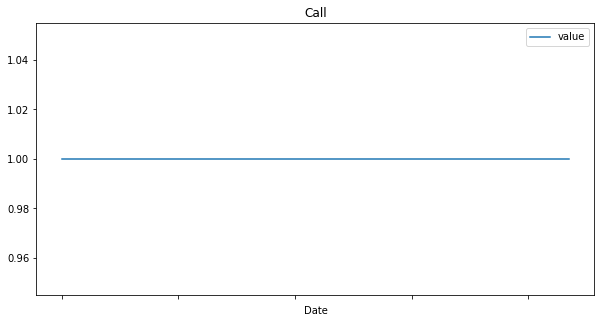

In [103]:
bp = df_list[5].groupby('id').plot('Date','value', figsize=(10,5), title='Call')

In [104]:
complete_data = pd.concat(df_list)
complete_data.to_csv(r'data_rightformat2.csv', index = False)
complete_data

,id,Date,variable,value
0,AS14.01,2014-02-26,mood,6.250000
1,AS14.01,2014-02-27,mood,6.333333
2,AS14.01,2014-03-21,mood,6.200000
3,AS14.01,2014-03-22,mood,6.400000
4,AS14.01,2014-03-23,mood,6.800000
5,AS14.01,2014-03-24,mood,6.000000
6,AS14.01,2014-03-25,mood,6.750000
7,AS14.01,2014-03-26,mood,6.600000
8,AS14.01,2014-03-27,mood,7.000000
9,AS14.01,2014-03-28,mood,6.400000


In [105]:
complete_data2 = complete_data

#combine ID and date because you want to use unique combinations of those 2 variables
complete_data2["ID_date"] = complete_data["id"] + " " + complete_data["Date"]
complete_data2 = ["ID_date", "variable", "value"]

#set variables as columns
complete_data2 = complete_data.pivot(index="ID_date", columns='variable', values='value').fillna(np.nan).reset_index()

#set back the two separate variables id and date
complete_data2[['id','date']] = complete_data2.ID_date.str.split(expand=True)
complete_data2 = complete_data2.drop(columns="ID_date")
cols = complete_data2.columns.tolist()
cols = cols[-2:] + cols[:-2]
complete_data2 = complete_data2[cols]

complete_data2.to_csv(r'data_rightformat3.csv', index = False)

complete_data2

variable,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
6,AS14.01,2014-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,-0.250000,0.750000,6.250000,NaN,1.0
8,AS14.01,2014-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.333333,6.333333,NaN,NaN
9,AS14.01,2014-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [106]:
#check for consecutive days per patient
#first make a list with one data frame per patient, because we want to look at this per patient
complete_data3 = complete_data2
grouped = complete_data3.groupby(complete_data3.id)

patient_list = []
complete_data3.id.unique()

for patient in complete_data3.id.unique():
    sep_data = grouped.get_group(patient)
    patient_list.append(sep_data)

#then make a dictionary linking dates to integers of these dates (because with integers you can easily check if they are consecutive) 
dicts_dates = []
    
for patient in patient_list:
    date_dict = {}
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in patient['date']]
    date_ints = list([d.toordinal() for d in dates])
    for i in range(len(date_ints)):
        date_dict[int(date_ints[i])] = list(patient['date'])[i]
    dicts_dates.append(date_dict)

#add new column to data frames that indicates if there's enough history for this date (now that is 5 days history)
for patient in range(len(dicts_dates)):
    enough_history = []
    for i in dicts_dates[patient].keys():
        if (i-1 and i-2 and i-3 and i-4 and i-5) in dicts_dates[patient].keys():
            enough_history.append('Yes')
        else:
            enough_history.append('No')
    #the following line gives a warning, but I checked it and I think it's doing what it's supposed to do.
    patient_list[patient]['enough_history'] = enough_history
    
#put all patients back into one data frame
complete_data4 = pd.concat(patient_list)
    
complete_data4


/Users/Fabri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


variable,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,enough_history
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,No
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,No
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,No
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,No
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,No
5,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Yes
6,AS14.01,2014-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Yes
7,AS14.01,2014-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,-0.250000,0.750000,6.250000,NaN,1.0,Yes
8,AS14.01,2014-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.333333,6.333333,NaN,NaN,Yes
9,AS14.01,2014-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,No


In [107]:
# add history from 5 days as columns, first separate per patient, because you don't want to add values from one patient as history to another patient

grouped = complete_data4.groupby(complete_data4.id)

patient_list = []
complete_data4.id.unique()

for patient in complete_data4.id.unique():
    sep_data = grouped.get_group(patient)
    patient_list.append(sep_data)  
    

new_patient_list = []
for patient in patient_list:
    for variable in VARIABLE_LIST.tolist():
        temps = patient[variable]
        patient_history = pd.concat([temps.shift(5), temps.shift(4), temps.shift(3), temps.shift(2), temps.shift(1)], axis=1)
        patient_history.columns = [(variable + '-5'),(variable + '-4'),(variable + '-3'),(variable + '-2'), (variable + '-1')]
        patient = pd.concat([patient, patient_history], axis=1)
    new_patient_list.append(patient)
        

#put all patients back into one data frame
history_data = pd.concat(new_patient_list)

#remove rows for which there is not enough data
history_data = history_data[history_data.enough_history != 'No']

#remove all rows with no input for mood (which is the variable we want to predict)
history_data = history_data[history_data.mood.notnull()]

#save
history_data.to_csv(r'history_data.csv', index = False)

#print example
new_patient_list[0]

,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.utilities-5,appCat.utilities-4,appCat.utilities-3,appCat.utilities-2,appCat.utilities-1,appCat.weather-5,appCat.weather-4,appCat.weather-3,appCat.weather-2,appCat.weather-1
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AS14.01,2014-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AS14.01,2014-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AS14.01,2014-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
#How many days per patient?

#Create separate data frames per patient
grouped = history_data.groupby(history_data.id)

patient_list = []
history_data.id.unique()

for patient in history_data.id.unique():
    sep_data = grouped.get_group(patient)
    patient_list.append(sep_data)  

for patient in patient_list:
    count_row = patient.shape[0]
    print(count_row)

47
41
47
51
44
45
59
46
37
49
43
55
53
54
46
44
37
55
30
67
42
36
39
45
41
37
43


In [109]:
#how many values registerd per attribute
print(history_data.count(axis=0)[:50]) #print separate parts of the list, because otherwise it won't show the whole list
print(history_data.count(axis=0)[50:100])
print(history_data.count(axis=0)[100:118])

id                      1233
date                    1233
activity                1131
appCat.builtin          1129
appCat.communication    1120
appCat.entertainment     798
appCat.finance           201
appCat.game              185
appCat.office            265
appCat.other            1076
appCat.social            937
appCat.travel            407
appCat.unknown           244
appCat.utilities         410
appCat.weather           109
call                     724
circumplex.arousal      1233
circumplex.valence      1231
mood                    1233
screen                  1140
sms                      417
enough_history          1233
mood-5                  1107
mood-4                  1130
mood-3                  1155
mood-2                  1169
mood-1                  1189
circumplex.arousal-5    1107
circumplex.arousal-4    1130
circumplex.arousal-3    1155
circumplex.arousal-2    1169
circumplex.arousal-1    1189
circumplex.valence-5    1106
circumplex.valence-4    1129
circumplex.val

# LSTM

## Preparing the Data

### Preprocessing

First we replace the NaN values with zeros and we convert the 'date' columns into Timestamp values.

In [110]:
patient_list = data_lstm['id'].unique()

def preprocess(data):
    """
    Replaces NaN values with zeros and sets 'date' column to DateTime format.
    """
    result = data.copy()
    result = result.fillna(0)
    result['date'] = pd.to_datetime(result['date'])
    
    return result

data_lstm = preprocess(complete_data2)
data_lstm[:5]


variable,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,AS14.01,2014-02-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,AS14.01,2014-02-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,AS14.01,2014-02-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,AS14.01,2014-02-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Auxiliary methods


In [111]:
from pandas import DataFrame
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim


def get_patient_data(patient_id, data):
    """
    Returns the subset of the data of a given patient.
    """
    return data.loc[data['id'] == patient_id]


def get_history_dates(date):
    """
    Returns a list of 5 dates previous to the input date.
    
    out: list of 5 date elements.
    """
    return [date - pd.to_timedelta(i, unit='d') for i in range(1,6)]


def history_in_data(date, history, patient_data):
    """
    Returns True if there exists 5 consecutive days in the data previous to the specified date, and False otherwise.
    
    in history: List of dates.
    out: Boolean.
    """
    for history_date in history:
        row = patient_data.loc[patient_data['date'] == history_date]
        if len(row.index) == 0:
            return False
    return True


def get_time_series(history, patient_data):
    """
    Creates a list of row vectors. Each vector is a row from the patient_data corresponding to one specified date.
    
    in history: List of dates.
    out: list of row vectors.
    """
    time_series = []
    
    for history_date in history:
        row = patient_data.loc[patient_data['date'] == history_date]
        row = row.drop(columns=['id', 'date'])
        time_series.append(row.values.tolist()[0])

    return time_series
        

In [112]:
## Example ##

patient1_data = get_patient_data(patient_list[0], data_lstm)
date1 = patient1_data.loc[0]['date']
date2 = patient1_data.loc[5]['date']
history1 = get_history_dates(date1)
history2 = get_history_dates(date2)
time_series = get_time_series(history2, patient1_data)
    
print('Date ', date1, 'has history: ', history_in_data(date1, history1, patient1_data))
print('Date ', date2, 'has history: ', history_in_data(date2, history2, patient1_data))
print('\nTime series for date ', date2, ':\n', time_series)
    
del patient1_data, time_series

Date  2014-02-17 00:00:00 has history:  False
Date  2014-02-22 00:00:00 has history:  True

Time series for date  2014-02-22 00:00:00 :
 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


### Creating the instances

In [113]:
def create_instances(data):
    """
    Creates a list of time series instances, each consisting of 5 row vectors, with their corresponding targets.
    Only creates intances where 'mood' column is non zero. Casts variables to pytorch tensor format.
    """
    instances = []
    targets = []

    for patient_id in tqdm(patient_list):
        patient_data = get_patient_data(patient_id, data)

        for i, row in patient_data.iterrows():
            if row['mood'] == 0:
                continue

            date = row['date']
            history = get_history_dates(date)

            if history_in_data(date, history, patient_data):
                time_series = get_time_series(history, patient_data)
                target = row['mood']
                targets.append(target)
                instances.append(time_series)

    return torch.tensor(instances), torch.tensor(targets)

instances, targets = create_instances(data_lstm)


100%|██████████| 27/27 [00:12<00:00,  2.49it/s]


In [114]:
## Example ##

print('First instance:\n', instances[0])
print('\nFirst target:\n', targets[0])

First instance:
 tensor([[8.1548e-02, 2.4898e+02, 2.1682e+03, 3.5086e+02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.1345e+01, 8.0773e+02, 0.0000e+00, 4.5173e+01, 2.1074e+01,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2759e+03,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.000

### Splitting the data

In [115]:
def split_data(features, labels, val_size=100, test_size=200):
    """
    Performs a random permutation of indices and selects from the data the training set, validation set and test set.
    
    in features: matrix of feature vectors.
    in labels: target values.
    in val_size: size of validation set.
    in test_size: size of test set.
    out val_data: tuple val_features, val_labels.
    out test_data: tuple test_features, test_labels.
    out train_data: tuple train_features, train_labels.
    """
    data_size = len(features)
    
    idx = torch.randperm(len(features))
    val_idx = idx[:val_size]
    test_idx = idx[val_size:(test_size+val_size)]
    train_idx = idx[(test_size+val_size):]
    
    val_data = features[val_idx], labels[val_idx]
    test_data = features[test_idx], labels[test_idx]
    train_data = features[train_idx], labels[train_idx]

    return val_data, test_data, train_data
    
val_data, test_data, train_data = split_data(instances_tensor, labels_tensor)

## The Model

In [116]:
class LSTM(nn.Module):
    """
    Pytorch implementation of LSTM model.
    """

    def __init__(self, seq_length, input_dim, num_hidden, num_classes, device='cpu'):
        super(LSTM, self).__init__()

        self.num_hidden = num_hidden
        self.seq_length = seq_length
        self.device = torch.device(device)

        self.w_gx = nn.Parameter(torch.randn(input_dim, num_hidden).to(self.device))
        self.w_gh = nn.Parameter(torch.randn(num_hidden, num_hidden).to(self.device))
        self.b_g = nn.Parameter(torch.zeros(num_hidden).to(self.device))

        self.w_ix = nn.Parameter(torch.randn(input_dim, num_hidden).to(self.device))
        self.w_ih = nn.Parameter(torch.randn(num_hidden, num_hidden).to(self.device))
        self.b_i = nn.Parameter(torch.zeros(num_hidden).to(self.device))

        self.w_fx = nn.Parameter(torch.randn(input_dim, num_hidden).to(self.device))
        self.w_fh = nn.Parameter(torch.randn(num_hidden, num_hidden).to(self.device))
        self.b_f = nn.Parameter(torch.zeros(num_hidden).to(self.device))

        self.w_ox = nn.Parameter(torch.randn(input_dim, num_hidden).to(self.device))
        self.w_oh = nn.Parameter(torch.randn(num_hidden, num_hidden).to(self.device))
        self.b_o = nn.Parameter(torch.zeros(num_hidden).to(self.device))

        self.w_ph = nn.Parameter(torch.randn(num_hidden, num_classes).to(self.device))
        self.b_p = nn.Parameter(torch.zeros(num_classes).to(self.device))

        self.tanh = nn.Tanh().to(self.device)
        self.sigmoid = nn.Sigmoid().to(self.device)

    def forward(self, x):
        """
        Forward propagation.
        
        in x: input features.
        out p_t: prediction of recurrent networ.
        """
        h_t = nn.Parameter(torch.zeros(1, self.num_hidden).to(self.device))
        c_t = nn.Parameter(torch.zeros(1, self.num_hidden).to(self.device))
        
        for x_t in torch.t(x):
            x_t = x_t.reshape(-1,1).T
            
            g_t = self.tanh(x_t @ self.w_gx + h_t @ self.w_gh + self.b_g)
            i_t = self.sigmoid(x_t @ self.w_ix + h_t @ self.w_ih + self.b_i)
            f_t = self.sigmoid(x_t @ self.w_fx + h_t @ self.w_fh + self.b_f)
            o_t = self.sigmoid(x_t @ self.w_ox + h_t @ self.w_oh + self.b_o)

            c_t = g_t * i_t + c_t * f_t
            h_t = self.tanh(c_t) * o_t

            p_t = h_t @ self.w_ph + self.b_p
            
        return p_t

### Evaluation Metric

In [117]:
def MSE(predicted, observed):
    """
    Computes mean squared error over predicted and observed variables
    """
    return sum([(observed[i] - predicted[i])**2 for i in range(len(predicted))]) / len(predicted)

### Training Loop

In [120]:
def train_lstm(data, learning_rate=0.001, hidding_units=20, epochs=10, early_stop_threshold=10, eval_freq=100, plot=True, print_eval=True):
    """
    Training loop for LSTM model with evaluation over validation set and early stopping. 
    Saves model with parameters yielding best performance over validation set.
    Plots training loss and validation MSE after training.
    
    in data: tuple train_data, val_datta.
    in learning_rate: hyperparameter.
    in hidden_units: number of hidden units for hidden layers.
    in epochs: maximum number of epochs.
    in early_stop_threshold: number of evaluations without improvement since the best performance necessary for early stopping.
    in eval_freq: number of iterations before evaluating performance.
    in plot: boolean. True for plotting, False otherwise.
    in print_eval: boolean. True for printing progress, False otherwise.
    out best_mse: best MSE score obtained over validation set.
    """
    train_data, val_data = data
    train_x, train_y,  = train_data

    loss_list = []
    eval_list = []
    best_mse = np.Inf
    evals_without_improve = 0

    # Initializing model
    lstm_model = LSTM(5, 19, hidding_units, 1)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(lstm_model.parameters(), lr=learning_rate, momentum=0.9)

    for e in range(1, epochs+1):
        running_loss = 0.
        for i, x in enumerate(train_x):
            # Forward pass and backpropagation
            label = torch.tensor(train_y[i])

            optimizer.zero_grad()
            out = lstm_model(x.T)
            loss = criterion(out, label)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Evaluation
            if not i % eval_freq and i != 0:                
                with torch.no_grad():
                    val_x, val_y = val_data
                    predictions = [lstm_model(x.T) for x in val_x]
                    eval_mse = MSE(predictions, val_y.tolist()).item()
                    
                if print_eval:
                    print("Epoch: %2d/%2d. Iteration: %4d/%4d. Training Loss: %2.3f. Validation MSE: %2.3f" %
                     (e, epochs, i, len(train_x), running_loss/eval_freq, eval_mse))
                
                loss_list.append(running_loss/eval_freq)
                eval_list.append(eval_mse)
                running_loss = 0

                # Early stopping
                if eval_mse < best_mse:
                    best_mse = eval_mse
                    torch.save([e, i, lstm_model, optimizer], 'models/lstm')
                    evals_without_improve = 0
                else:
                    evals_without_improve += 1

                if evals_without_improve == early_stop_threshold:
                    print('Early stopping.')
                    break

            if evals_without_improve == early_stop_threshold:
                break

    if plot:
        x_ax = np.arange(0, len(loss_list) * eval_freq, eval_freq)

        plt.figure()
        plt.plot(x_ax, loss_list, label="Training MSE")
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.legend()
        plt.show()

        plt.figure()
        plt.plot(x_ax, eval_list, label="Validation MSE")
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.legend()
        plt.show()
        
    return best_mse   

### Training a Model

/Users/Fabri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/Fabri/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  1/10. Iteration:  100/ 902. Training Loss: 8.381. Validation MSE: 2.937


/Users/Fabri/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/Fabri/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Tanh. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/Fabri/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sigmoid. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch:  1/10. Iteration:  200/ 902. Training Loss: 2.806. Validation MSE: 1.876
Epoch:  1/10. Iteration:  300/ 902. Training Loss: 1.426. Validation MSE: 1.428
Epoch:  1/10. Iteration:  400/ 902. Training Loss: 1.733. Validation MSE: 1.046
Epoch:  1/10. Iteration:  500/ 902. Training Loss: 0.901. Validation MSE: 1.057
Epoch:  1/10. Iteration:  600/ 902. Training Loss: 0.783. Validation MSE: 0.877
Epoch:  1/10. Iteration:  700/ 902. Training Loss: 0.821. Validation MSE: 0.805
Epoch:  1/10. Iteration:  800/ 902. Training Loss: 0.884. Validation MSE: 0.719
Epoch:  1/10. Iteration:  900/ 902. Training Loss: 0.856. Validation MSE: 0.661
Epoch:  2/10. Iteration:  100/ 902. Training Loss: 0.642. Validation MSE: 0.616
Epoch:  2/10. Iteration:  200/ 902. Training Loss: 0.837. Validation MSE: 0.644
Epoch:  2/10. Iteration:  300/ 902. Training Loss: 0.630. Validation MSE: 0.614
Epoch:  2/10. Iteration:  400/ 902. Training Loss: 0.916. Validation MSE: 0.587
Epoch:  2/10. Iteration:  500/ 902. Trai

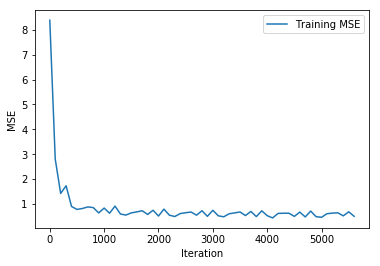

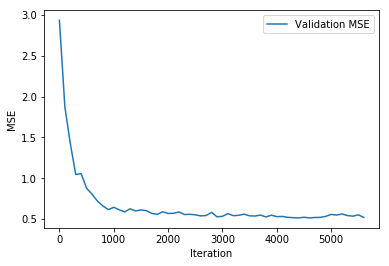

0.5139248371124268

In [122]:
data = train_data, val_data

train_lstm(data)